## The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # Predicts true/false for these two flowers

for i in range(2):
    print(f"Prediction for {X_new[i]} - {y_pred[i]}")

Prediction for [2, 0.5] - True
Prediction for [3, 1] - False


Scikit-learn's ```Perceptron``` class is equivalent to using ```SDGClassifier``` with the follwing hyperparameters:
```loss="perceptron", learning_rate="constant", eta0=1, penalty=None``` (no regularization)

#### Activation functions
![](images/activation_functions.png)

## Regression MLPs

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

print(f"RMSE: {root_mean_squared_error(y_valid, y_pred):.3f}")

RMSE: 0.505


#### Typical regression MLP architecture

| Hyperparameter | Typical value |
|-|-|
| # hidden layers | Depends on the problem, but typically 1 to 5 |
| # neurons per hidden layer | Depends on the problem, but typically 10 to 100 |
| # output neurons | 1 per prediction dimension |
| Hidden activation | ReLU |
| Output activation | None, or ReLU/softplus (if positive outputs) or sigmoid/tanh (if bounded outputs) |
| Loss function | MSE, or Huber if outliers |


## Classification MLPs

In [3]:
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], random_state=42, max_iter=10000)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)

print(f"accuracy: {accuracy}")

accuracy: 1.0


#### Typical classification MLP architecture

| Hyperparameter | Binary classification | Multilabel binary classification | Multiclass classification | 
|-|-|-|-|
| # hidden layers | 1-5 | 1-5 | 1-5 |
| # output neurons | 1 | 1 per binary label | 1 per class |
| Output layer activation | Sigmoid | Sigmoid | Softmax | 
| Loss function | X-entropy | X-entropy | X-entropy |

## Implementing MLP's with Keras

#### Using Keras to load the dataset

In [10]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train.shape

(55000, 28, 28)

In [11]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.0

In [12]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

Corresponding class names

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

#### Samples from Fashion MNIST

![](images/fashion_mnist)

#### Creating the model using the sequential API 

In [19]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In the last ```Dense``` output layer we use 10 neurons (one per each class) with the softmax activation function, since the classes are exclusive

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

```None``` in the Output Shape means the batch size can be anything

In [21]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [23]:
weights, biases = hidden1.get_weights()

print(weights.shape)
weights

(784, 300)


array([[ 0.04078149, -0.02636241,  0.03549331, ..., -0.07031853,
         0.06049806,  0.01202976],
       [ 0.03802758, -0.00718942, -0.00465675, ...,  0.01597548,
        -0.02785086,  0.07303254],
       [ 0.05822413,  0.04217714,  0.01283249, ...,  0.007081  ,
        -0.03972456, -0.05641918],
       ...,
       [-0.05013557, -0.05792522,  0.02725093, ..., -0.01047514,
        -0.06398867,  0.07004684],
       [ 0.05197451, -0.05424773,  0.013122  , ...,  0.02055207,
         0.00282791,  0.0267873 ],
       [-0.0260615 ,  0.01450137,  0.0011103 , ..., -0.00191413,
         0.0475565 , -0.06617603]], dtype=float32)

In [24]:
print(biases.shape)
biases

(300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### Compiling the model

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

We use ```"sparse_categorical_crossentropy"``` loss because we have sparse labels, and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors), then we would need to use the ```"categorical_crossentropy"``` loss instead. If we were doing binary classification, then we would use the ```"sigmoid"``` activation function in the output layer instead of the ```"softmax"``` activation function, and we would use the ```"binary_crossentropy"``` loss.

#### Training and evaluating the model

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6829 - loss: 1.0013 - val_accuracy: 0.8294 - val_loss: 0.5103
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8253 - loss: 0.5106 - val_accuracy: 0.8384 - val_loss: 0.4568
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8429 - loss: 0.4531 - val_accuracy: 0.8458 - val_loss: 0.4321
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8530 - loss: 0.4221 - val_accuracy: 0.8490 - val_loss: 0.4148
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8606 - loss: 0.4004 - val_accuracy: 0.8552 - val_loss: 0.4017
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8659 - loss: 0.3835 - val_accuracy: 0.8574 - val_loss: 0.3926
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8706 - loss: 0.3697 - val_accuracy: 0.8622 - val_loss: 0.3838
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8741 - loss: 0.3575 - 

In [27]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

#### Learning curves

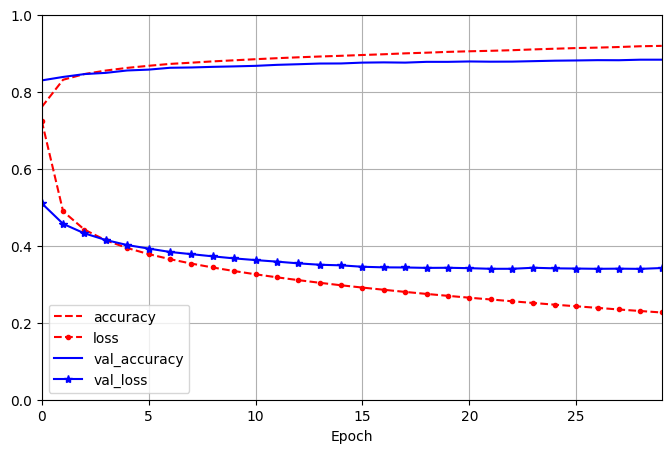

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

The validation curves are relatively close to each other at first, but they get further apart over time, which shows that there is a bit of overfitting. The model has not quite converged yet, as the validation loss is still going down, so we should probably continue training.

In [30]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.8741 - loss: 0.3672


[0.3639205992221832, 0.8741999864578247]

#### Using the model to make predictions

In [31]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.01, 0.  , 0.78],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

![](images/fashion_mnist_predictions)